In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
Sales=pd.read_csv(r"D:\DSA - ICT\Week 7\Case study\Sales_add.csv")

In [3]:
#To check the data set information 

In [4]:
Sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 5 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Month                           22 non-null     object
 1   Region                          22 non-null     object
 2   Manager                         22 non-null     object
 3   Sales_before_digital_add(in $)  22 non-null     int64 
 4   Sales_After_digital_add(in $)   22 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 1008.0+ bytes


In [5]:
#To check the data set 

In [6]:
Sales.groupby("Manager").describe().T

Manager                                 Manager - A    Manager - B  \
Sales_before_digital_add(in $) count       9.000000       7.000000   
                               mean   145875.222222  155499.285714   
                               std     14596.609108   14040.774584   
                               min    131140.000000  137163.000000   
                               25%    132921.000000  147061.500000   
                               50%    146278.000000  152493.000000   
                               75%    147463.000000  163760.500000   
                               max    178939.000000  177195.000000   
Sales_After_digital_add(in $)  count       9.000000       7.000000   
                               mean   244402.666667  218899.142857   
                               std     23410.660221   30539.536525   
                               min    205180.000000  187305.000000   
                               25%    229336.000000  192626.000000   
                               50%    244243.000000  212579.000000   
                               75%    263388.000000  244378.000000   
                               max    276279.000000  258402.000000   

Manager                                 Manager - C  
Sales_before_digital_add(in $) count       6.000000  
                               mean   146984.500000  
                               std     16329.359323  
                               min    130263.000000  
                               25%    133184.250000  
                               50%    145210.500000  
                               75%    156894.000000  
                               max    171259.000000  
Sales_After_digital_add(in $)  count       6.000000  
                               mean   225467.333333  
                               std     13495.554819  
                               min    203175.000000  
                               25%    222413.000000  
                               50%    224797.500000  
                               75%    232746.250000  
                               max    243020.000000

In [7]:
Sales.groupby("Manager").agg({"Sales_before_digital_add(in $)":["mean","max","min","median","std"],"Sales_After_digital_add(in $)":["mean","max","min","median","std"]})

Sales_before_digital_add(in $)                            \
                                      mean     max     min    median   
Manager                                                                
Manager - A                  145875.222222  178939  131140  146278.0   
Manager - B                  155499.285714  177195  137163  152493.0   
Manager - C                  146984.500000  171259  130263  145210.5   

                          Sales_After_digital_add(in $)                  \
                      std                          mean     max     min   
Manager                                                                   
Manager - A  14596.609108                 244402.666667  276279  205180   
Manager - B  14040.774584                 218899.142857  258402  187305   
Manager - C  16329.359323                 225467.333333  243020  203175   

                                     
               median           std  
Manager                              
Manager - A  244243.0  23410.660221  
Manager - B  212579.0  30539.536525  
Manager - C  224797.5  13495.554819

In [8]:
#The company wishes to clarify whether there is any increase in sales after stepping into digital marketing

In [9]:
#Assume Null hypothesis as no increase in sales after stepping into digital marketing
#Alternate hypothesis is there is increase in sales after stepping into digital marketing

In [10]:
SBD=Sales["Sales_before_digital_add(in $)"]
SAD=Sales["Sales_After_digital_add(in $)"]

In [11]:
#To check the assumption of normal distribution and equal variance for t test 

Text(0, 0.5, 'Frequency')

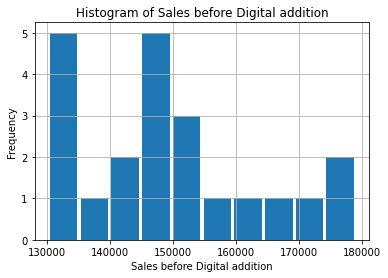

In [12]:
SBD.hist(rwidth=0.9)
plt.title("Histogram of Sales before Digital addition")
plt.xlabel("Sales before Digital addition")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

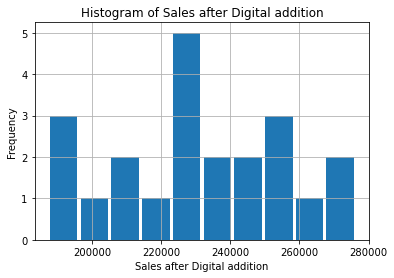

In [13]:
SAD.hist(rwidth=0.9)
plt.title("Histogram of Sales after Digital addition")
plt.xlabel("Sales after Digital addition")
plt.ylabel("Frequency")

In [14]:
#Normal distribution check

In [15]:
stats.shapiro(SBD)

ShapiroResult(statistic=0.9306764006614685, pvalue=0.12674309313297272)

In [16]:
stats.shapiro(SAD)

ShapiroResult(statistic=0.9702128767967224, pvalue=0.7159645557403564)

In [17]:
#Here in both above cases , p values is greater than 0.05 alpha value , hence the distribution is normal 

In [18]:
#Equal variance check

In [19]:
stats.levene(SBD,SAD,center="mean")

LeveneResult(statistic=5.171664124853503, pvalue=0.028130575490495715)

In [20]:
#Here the p value is less than alpha value of 0.05 , hence the variance is not equal 
#So we need to use welch t test for unequal variance

In [21]:
t_stat,p_value=stats.ttest_ind(SBD,SAD,equal_var=False)
print("T statistics value is ", t_stat)
print("p value is ",p_value)

T statistics value is  -12.995084451110877
p value is  1.1019671619608604e-14


In [22]:
Dof=(len(SBD)-1)*(len(SAD)-1)
print("Degree of Freedom is",Dof)

Degree of Freedom is 441


In [23]:
t_critical = stats.t.ppf(q=1-0.05/2, df=Dof)
print("T critical value is ",t_critical)

T critical value is  1.9653578272029777


In [24]:
if (abs(t_stat)>t_critical)&(p_value<0.05):
    print('We can reject the null hypothesis and confirm there is improvement after stepping into digital marketing')
else:
    print('we can accept null hypothesis and confirm there is no improvement')

We can reject the null hypothesis and confirm there is improvement after stepping into digital marketing


In [25]:
# Here the p value is less than 0.05 and t statistic value is greater than t critical value
# Hence we can reject the null hypothesis 
# We can confirm there is a improvement in sales after stepping into Digital marketing

In [26]:
#Plot showing sales before and after digital marketing addition

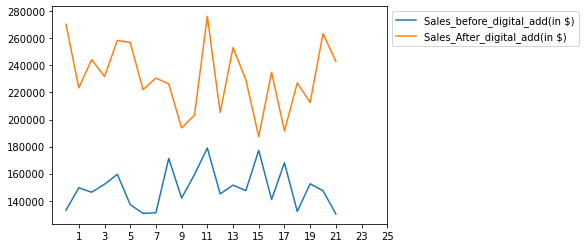

In [27]:
plt.figsize=(10,8)
plt.plot(Sales["Sales_before_digital_add(in $)"])
plt.plot(Sales["Sales_After_digital_add(in $)"])
plt.legend(["Sales_before_digital_add(in $)","Sales_After_digital_add(in $)"],bbox_to_anchor=(1, 1))
plt.xticks(np.arange(1,26,2))
plt.show()

In [28]:
#We can see from the plot that sales after digital add is more than sales before digital add 
#This shows that there is improvement after digital marketing

In [29]:
#to check whether there is any dependency between the features “Region” and “Manager”

In [30]:
Dep=pd.crosstab(Sales["Region"], Sales["Manager"])
Dep

Manager,Manager - A,Manager - B,Manager - C
Region,,,
Region - A,4,3,3
Region - B,4,1,2
Region - C,1,3,1


In [31]:
#Null hypothesis: variables are independent
#Alternate hypothesis:variables are dependent

In [32]:
Chi=stats.chi2_contingency(Dep)
Chi

(3.050566893424036,
 0.5493991051158094,
 4,
 array([[4.09090909, 3.18181818, 2.72727273],
        [2.86363636, 2.22727273, 1.90909091],
        [2.04545455, 1.59090909, 1.36363636]]))

In [33]:
Chi_Stat_value=Chi[0]
p_val=Chi[1]
d_o_f=Chi[2]
alpha=0.05
print("Chi square statistics value is",Chi_Stat_value)
print("p value is ",p_val)
print("significant level is alpha = ",alpha)
print("Degree of freedom is",d_o_f)

Chi square statistics value is 3.050566893424036
p value is  0.5493991051158094
significant level is alpha =  0.05
Degree of freedom is 4


In [34]:
Chi_critical=stats.chi2.ppf(q=1-alpha,df=d_o_f)
print("Critical value of Chi square test is " ,Chi_critical)

Critical value of Chi square test is  9.487729036781154


In [35]:
if(Chi_Stat_value>=Chi_critical)&(p_val<=alpha):
    print("Reject null hypothesis and there is dependency between variables")
else:
    print("Fail to reject null hypothesis and there is no dependency between 2 variables")

Fail to reject null hypothesis and there is no dependency between 2 variables


In [36]:
#P value of 0.5493 is greater than 0.05 and Chi square statistic value is greater than Chi critical
# we fail to reject the null hypothesis and the variables are independent